Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [34]:
x_point = []
y_point = []

In [35]:
x_point = [2, 2, 0, -2, -2, 0, 4]
y_point= [1, 2, 6, 10, 0, 0, -20]
d = [1, 1, 1, -1, -1, -1, -1]

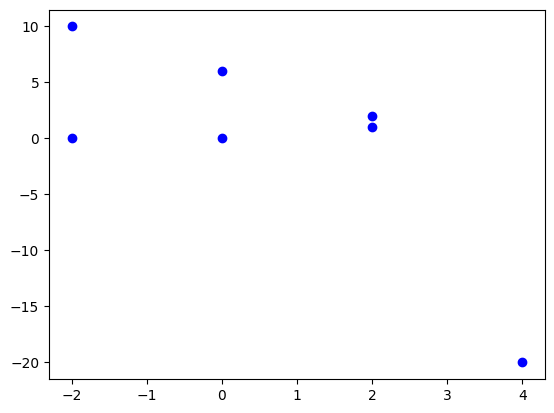

In [36]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [37]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Definiujemy model:

In [39]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [40]:
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [41]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [42]:
model.compile(loss='MSE',optimizer=opt)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [44]:
epochs = 1000
h = model.fit(real_x,real_y, verbose=1, epochs=epochs, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 276ms/step - loss: 114.5700
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 113.1708
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 111.7974
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 110.4491
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 109.1256
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 107.8264
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 106.5510
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 105.2991
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 104.0702
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 102.8637
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 101.6795
Epoch 12/1000
1/1 [==============================] - 0s 15ms/step - loss: 100.5169
Epoch 13/1000
1/1 [=

In [45]:
Loss = h.history['loss']
Loss

[114.57003021240234,
 113.17084503173828,
 111.79736328125,
 110.44910430908203,
 109.12559509277344,
 107.82640838623047,
 106.5510482788086,
 105.29911804199219,
 104.07015228271484,
 102.86373138427734,
 101.67945098876953,
 100.51689910888672,
 99.37564849853516,
 98.25531768798828,
 97.15555572509766,
 96.07594299316406,
 95.01609802246094,
 93.9756851196289,
 92.9543228149414,
 91.95167541503906,
 90.96739196777344,
 90.00110626220703,
 89.05254364013672,
 88.12132263183594,
 87.2071533203125,
 86.30967712402344,
 85.42862701416016,
 84.5636978149414,
 83.71456146240234,
 82.88094329833984,
 82.06258392333984,
 81.2591552734375,
 80.47041320800781,
 79.6960678100586,
 78.93585968017578,
 78.18952178955078,
 77.45680236816406,
 76.73746490478516,
 76.0312271118164,
 75.33787536621094,
 74.65715789794922,
 73.98883819580078,
 73.33270263671875,
 72.68852233886719,
 72.05606842041016,
 71.43511199951172,
 70.82546997070312,
 70.22692108154297,
 69.63924407958984,
 69.06226348876953,

Sprawdźmy jakie są **wartości wag**:

In [46]:
weights = model.get_weights()

print(weights[0][0][0])
print(weights[1][0])    #bias

-3.0866568
1.2872447


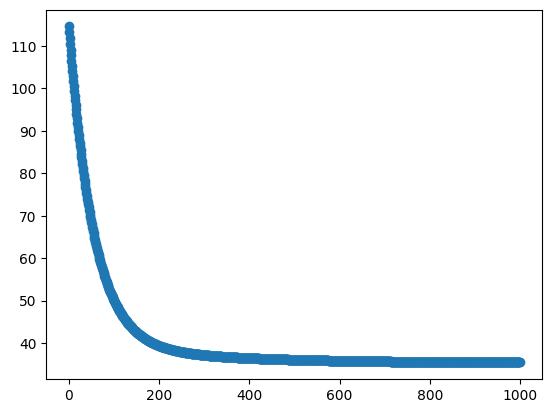

In [47]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzenie **modelu**:

In [48]:
#model.predict([0.6])